### Feature Engineering

In [94]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from Functions.timeline import *

In [95]:
# Reference: https://www.statista.com/statistics/306648/inflation-rate-consumer-price-index-cpi-united-kingdom-uk/
inflation = pd.read_csv('../Data/inflation.csv')
inflation['Date'] = pd.to_datetime(inflation['Date'], format='%b %y').dt.date
inflation['Inflation'] = inflation['Inflation']/100
inflation.head(5)

,Date,Inflation
0,1989-01-01,0.049
1,1989-02-01,0.050
2,1989-03-01,0.050
3,1989-04-01,0.053
4,1989-05-01,0.053


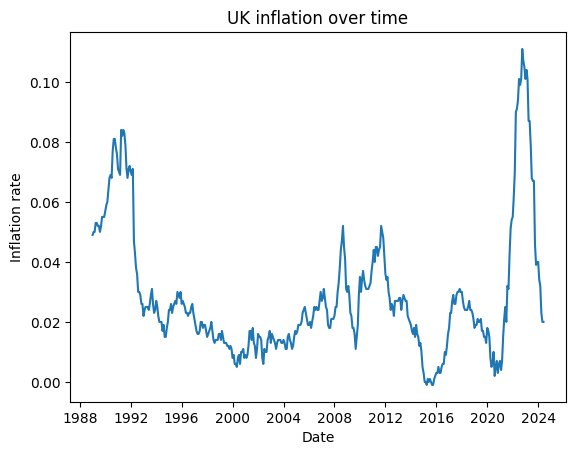

In [96]:
plt.plot(inflation['Date'], inflation['Inflation'])
plt.title('UK inflation over time')
plt.ylabel('Inflation rate')
plt.xlabel('Date')
plt.show()

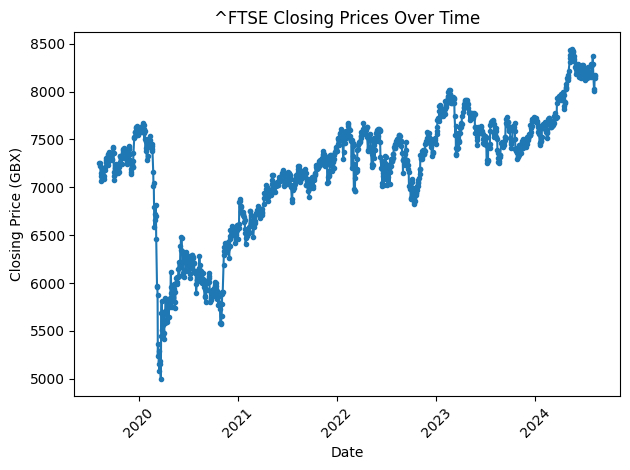

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-09,7285.899902,7297.299805,7237.100098,7253.899902,794807200,0.0,0.0
1,2019-08-12,7253.899902,7305.600098,7207.500000,7226.700195,585461200,0.0,0.0
2,2019-08-13,7226.700195,7281.100098,7166.899902,7250.899902,698409600,0.0,0.0
3,2019-08-14,7250.899902,7268.700195,7112.100098,7147.899902,811517700,0.0,0.0
4,2019-08-15,7147.899902,7148.799805,7020.200195,7067.000000,877816600,0.0,0.0


In [97]:
# Reference: https://pypi.org/project/yfinance/
ftse = Get5YSecurityPlot(security='^FTSE')
ftse.head(5)

In [98]:
ftse_filtered = ftse[ftse['Date'].isin(inflation['Date'])]
ftse_inflation = pd.merge(ftse, inflation, on='Date', how='inner')
ftse_inflation['Corrected Close'] = ftse_inflation['Close']/(1 + ftse_inflation['Inflation'])
ftse_inflation.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Inflation,Corrected Close
0,2019-10-01,7408.200195,7433.200195,7352.799805,7360.299805,734563400,0.0,0.0,0.015,7251.526901
1,2019-11-01,7248.399902,7307.200195,7248.399902,7302.399902,582078600,0.0,0.0,0.015,7194.482662
2,2020-04-01,5672.000000,5672.000000,5414.700195,5454.600098,1670362100,0.0,0.0,0.008,5411.309621
3,2020-05-01,5901.200195,5901.200195,5746.100098,5763.100098,781328900,0.0,0.0,0.005,5734.427958
4,2020-06-01,6076.600098,6179.299805,6076.600098,6166.399902,742112200,0.0,0.0,0.006,6129.622169


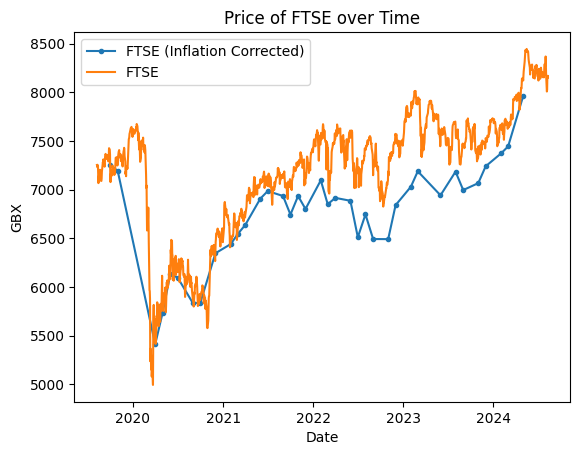

In [99]:
plt.plot(ftse_inflation['Date'], ftse_inflation['Corrected Close'], marker='.')
plt.plot(ftse['Date'], ftse['Close'])
plt.legend(['FTSE (Inflation Corrected)', 'FTSE'])
plt.title('Price of FTSE over Time')
plt.ylabel('GBX')
plt.xlabel('Date')
plt.show()

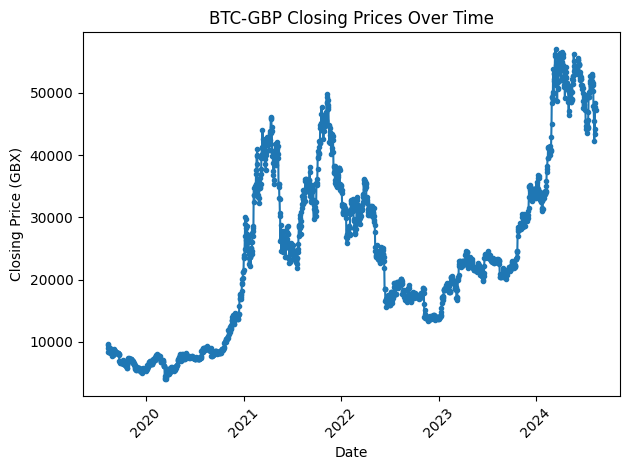

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-11,9428.228516,9585.428711,9343.958984,9585.428711,13121279972,0.0,0.0
1,2019-08-12,9582.231445,9582.231445,9370.578125,9424.601562,11299634484,0.0,0.0
2,2019-08-13,9426.390625,9459.284180,8973.510742,9032.261719,13828382580,0.0,0.0
3,2019-08-14,9026.732422,9027.061523,8315.168945,8334.742188,16576143237,0.0,0.0
4,2019-08-15,8324.040039,8626.843750,7978.304688,8528.679688,18939858084,0.0,0.0


In [100]:
# Reference: https://pypi.org/project/yfinance/
btc = Get5YSecurityPlot(security='BTC-GBP')
btc.head(5)

In [101]:
btc_filtered = btc[btc['Date'].isin(inflation['Date'])]
btc_inflation = pd.merge(btc, inflation, on='Date', how='inner')
btc_inflation['Corrected Close'] = btc_inflation['Close']/(1 + btc_inflation['Inflation'])
btc_inflation.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Inflation,Corrected Close
0,2019-09-01,7920.537109,8056.548340,7882.020020,8025.618164,9413438943,0.0,0.0,0.017,7891.463288
1,2019-10-01,6753.657227,6897.457520,6703.517090,6787.889648,12452060072,0.0,0.0,0.015,6687.576008
2,2019-11-01,7105.254883,7167.300293,7045.374512,7156.055176,18795688760,0.0,0.0,0.015,7050.300666
3,2019-12-01,5856.985840,5856.985840,5640.181152,5749.824707,14498458610,0.0,0.0,0.013,5676.036236
4,2020-01-01,5425.667969,5472.485840,5407.095215,5433.849121,14011191757,0.0,0.0,0.018,5337.769274


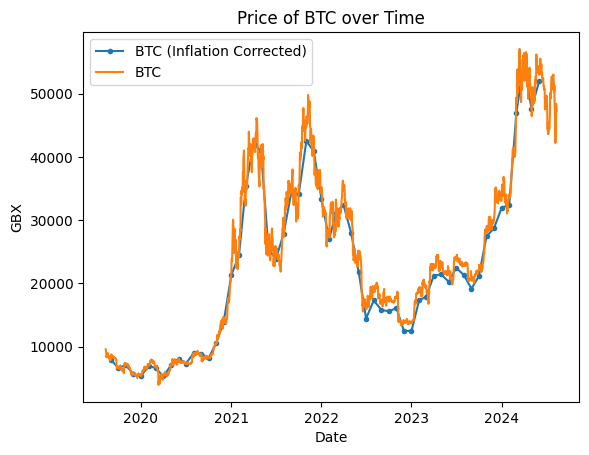

In [102]:
plt.plot(btc_inflation['Date'], btc_inflation['Corrected Close'], marker='.')
plt.plot(btc['Date'], btc['Close'])
plt.legend(['BTC (Inflation Corrected)', 'BTC'])
plt.title('Price of BTC over Time')
plt.ylabel('GBX')
plt.xlabel('Date')
plt.show()